# Estudio de Caso: Análisis de Ventas en una Tienda Online

Una empresa de comercio electrónico quiere optimizar su estrategia de marketing digital para aumentar las ventas. Para ello, ha recopilado datos de los últimos seis meses y ha identificado dos variables clave:

- Cantidad de visitas diarias a la página web.
- Cantidad de compras realizadas por día.

El equipo de análisis de datos sospecha que existe una relación entre estas dos variables y desea determinar si efectivamente hay una correlación positiva entre ellas. Adicionalmente, el equipo ha notado que el presupuesto destinado a publicidad también podría estar influenciando las compras, pero no están seguros si esta variable es una causa directa o solo un factor relacionado.

**Nota:** El conjunto de datos utilizado es simulado y fue creado únicamente con fines de aprendizaje y práctica.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau 
import matplotlib.pyplot as plt

### **Preparación y limpieza de los datos**

In [3]:
# Importando datos
df = pd.read_csv("tienda_online_visitas_compras.csv")

# Exploración inicial
df.head()

,date,visits,purchases,ad_budget
0,2025-01-01,3248,177,595
1,2025-01-02,2930,154,787
2,2025-01-03,3323,209,1010
3,2025-01-04,3761,221,552
4,2025-01-05,2882,187,688


Variables del data set:

- date: Fecha del registro (formato YYYY-MM-DD).
- visits: Número de visitas diarias al sitio web.
- purchases: Número de compras realizadas por día (transacciones, no monto monetario).
- ad_budget: Presupuesto destinado a publicidad en USD por día.

In [4]:
# Se verifican los tipos de datos en las columnas y si existen valores nulos en estas.   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       181 non-null    object
 1   visits     181 non-null    int64 
 2   purchases  181 non-null    int64 
 3   ad_budget  181 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ KB


In [5]:
# Se cambia el tipo de dato de la columna 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


In [6]:
# Verificación de valores duplicados

print("Duplicados en dataset:", df.duplicated().sum())

Duplicados en dataset: 0


In [7]:
# Validaciones de consistencia
print("#### Validaciones de Consistencia #####")

# Se valida que las columnas 'purchases', 'visits' y 'ad_budget' no contengan valores negativos
print("\nValores negativos en columna 'visits':", (df['visits'] < 0).sum())
print("Valores negativos en columna 'purchases':", (df['purchases'] < 0).sum())
print("Valores negativos en columna 'ad_budget':", (df['ad_budget'] < 0).sum())

#### Validaciones de Consistencia #####

Valores negativos en columna 'visits': 0
Valores negativos en columna 'purchases': 0
Valores negativos en columna 'ad_budget': 25


In [8]:
# Se reemplazan los valores negativos de la columna 'ad_budget' por valores nulos 
df['ad_budget'] = df['ad_budget'].where(df['ad_budget'] >= 0, np.nan)

# Se vuelve a verificar si existen valores negativos en la columna 'ad_budget'
print("Valores negativos en columna 'ad_budget':", (df['ad_budget'] < 0).sum())

Valores negativos en columna 'ad_budget': 0


Se identificaron 25 valores negativos en la variable ad_budget, los cuales se consideran inconsistencias en el registro, ya que esta variable representa el presupuesto destinado a publicidad y, por definición, debería tomar únicamente valores iguales o superiores a cero. Por ello, fueron reemplazados por NaN.

Esta decisión se justifica en que, al tratarse de datos simulados, no se dispone de un contexto que explique la aparición de valores negativos. En consecuencia, se optó por no imputarlos ni eliminar filas completas, preservando así la integridad de las demás variables (visits y purchases), en las cuales no se detectaron inconsistencias.

De este modo, los análisis de correlación que incluyan ad_budget se calcularán sobre un subconjunto de los datos, mientras que las correlaciones entre visits y purchases no se verán afectadas.

### **Análisis de Correlaciones**

#### Correlación entre la cantidad de visitas diarias a la página web y las compras realizadas

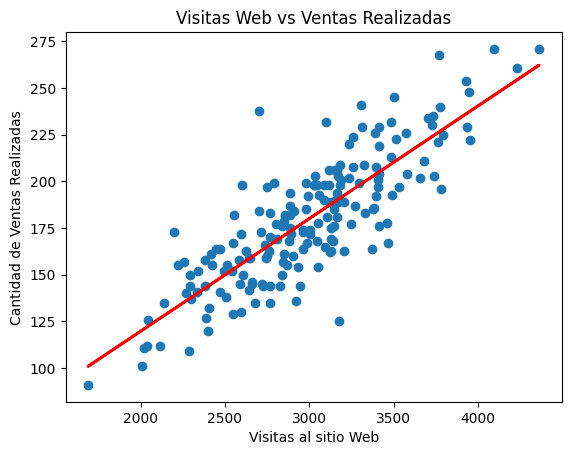

Coeficiente de Pearson: 0.83
Valor p: 0.0000


In [9]:
# Variables a trabajar
visitas = df['visits']
ventas = df['purchases']

# Diagrama de dispersión Visitas vs ventas
plt.scatter(visitas,ventas)
m, b = np.polyfit(visitas, ventas, 1)  
plt.plot(visitas, m*visitas + b, color="red", linewidth=2)
plt.title("Visitas Web vs Ventas Realizadas")
plt.xlabel("Visitas al sitio Web")
plt.ylabel("Cantidad de Ventas Realizadas")
plt.show()

# Cálculo del coeficiente de correlación de Pearson
r, p_valor = pearsonr(visitas, ventas)
print(f"Coeficiente de Pearson: {r:,.2f}")
print(f"Valor p: {p_valor:.4f}")

El diagrama de dispersión muestra una clara tendencia positiva: a mayor número de visitas, mayor es la cantidad de ventas. Este patrón visual se confirma con el coeficiente de correlación de Pearson (r = 0.83), que indica una relación fuerte, lineal y positiva entre ambas variables. Asimismo, el valor p menor a 0.001, respalda que dicha correlación es estadísticamente significativa y poco probable que se deba al azar.

Estos hallazgos respaldan la hipótesis del equipo de análisis: el tráfico web se asocia directamente con las ventas, de modo que un mayor flujo de visitas tiende a reflejarse en un incremento en las compras. No obstante, es importante señalar que la correlación no implica causalidad. Aunque el vínculo es fuerte, no se puede afirmar que el aumento de visitas sea la causa directa del aumento de ventas, ya que otros factores (como el presupuesto en publicidad u otros elementos externos) también pueden estar influyendo en la relación observada.

#### Correlación entre el gasto en publicidad y las visitas al sitio web

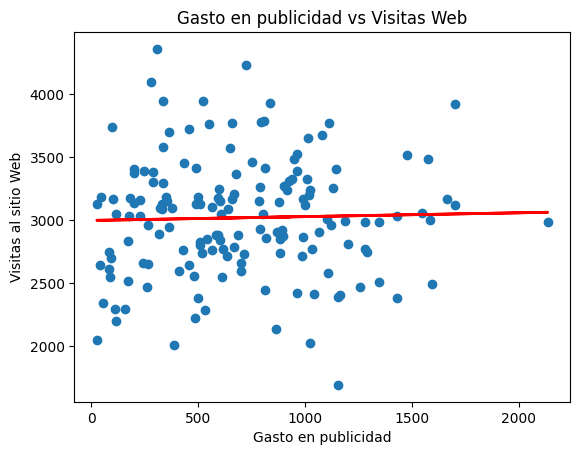

Coeficiente de Pearson: 0.03
Valor p: 0.7307


In [10]:
# Para la correlación se filtran filas que contengan valores nan
df_sin_nan = df.query("ad_budget.notna()")

g_publicidad = df_sin_nan['ad_budget']
visitas_web = df_sin_nan['visits']

# Diagrama de dispersión de gasto en publicidad vs visitas web
plt.scatter(g_publicidad,visitas_web)
m, b = np.polyfit(g_publicidad, visitas_web, 1)  
plt.plot(g_publicidad, m*g_publicidad + b, color="red", linewidth=2)
plt.title("Gasto en publicidad vs Visitas Web")
plt.xlabel("Gasto en publicidad")
plt.ylabel("Visitas al sitio Web")
plt.show()

# Calculos de correlación para gasto en públicidad vs visitas web

# Coeficiente de Pearson 
r, p_valor = pearsonr(g_publicidad, visitas_web)
print(f"Coeficiente de Pearson: {r:,.2f}")
print(f"Valor p: {p_valor:.4f}")

In [11]:
# Se calculan las correlaciones de Spearman y Kendall para evaluar si existe algún tipo de asociación monótona entre las variables.

# Correlación de Spearman
c_spearman = spearmanr(g_publicidad,visitas_web).correlation
print(f"Correlación de Spearman: {c_spearman:,.2f}")

# Correlación de Kendall
c_kendall = kendalltau(g_publicidad,visitas_web).correlation
print(f"Correlación de Kendall: {c_kendall:,.2f}")

Correlación de Spearman: 0.04
Correlación de Kendall: 0.03


El análisis de correlación entre el gasto en publicidad y las visitas al sitio web muestra un coeficiente de Pearson de 0.03, lo que indica ausencia de correlación lineal entre ambas variables. Esto se confirma visualizando el diagrama de dispersión, donde los datos no presentan una tendencia clara y la línea de tendencia ajustada es prácticamente horizontal. Además, el p-valor asociado (0.7307) es muy superior al umbral de 0.05, por lo que no existe evidencia estadística suficiente para concluir que el gasto en publicidad se relacione con el número de visitas.

De manera complementaria, se evaluaron correlaciones de Spearman (0.04) y Kendall (0.03) con el fin de explorar la posibilidad de asociaciones monótonas. Los resultados, igualmente cercanos a cero, confirman que no existe una ningún tipo de relación significativa entre las variables. Así, tanto el análisis lineal como el no lineal sugieren que el gasto en publicidad no guarda una relación directa ni significativa con el tráfico web.

#### Correlación entre el gasto en publicidad y el número de ventas

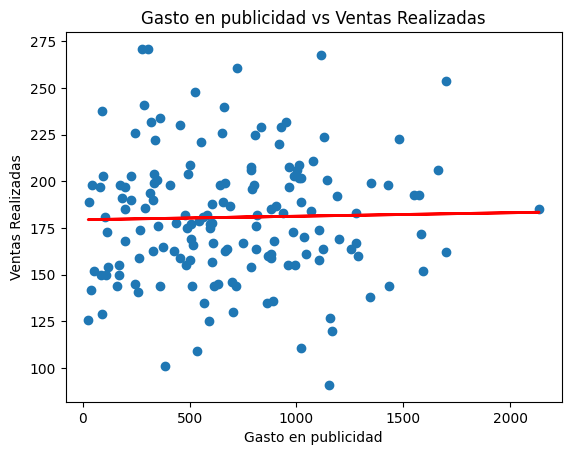

Coeficiente de Pearson: 0.02
Valor p: 0.7693


In [12]:
n_ventas = df_sin_nan['purchases']

# Diagrama de dispersión de gasto en publicidad vs visitas web
plt.scatter(g_publicidad, n_ventas)
m, b = np.polyfit(g_publicidad, n_ventas, 1)  
plt.plot(g_publicidad, m*g_publicidad + b, color="red", linewidth=2)
plt.title("Gasto en publicidad vs Ventas Realizadas")
plt.xlabel("Gasto en publicidad")
plt.ylabel("Ventas Realizadas")
plt.show()

# Calculos de correlación para gasto en públicidad vs ventas

# Coeficiente de Pearson 
r, p_valor = pearsonr(g_publicidad,n_ventas)
print(f"Coeficiente de Pearson: {r:,.2f}")
print(f"Valor p: {p_valor:.4f}")


In [13]:
# Se calculan las correlaciones de Spearman y Kendall para evaluar si existe algún tipo de asociación monótona entre las variables.

# Correlación de Spearman
c_spearman = spearmanr(g_publicidad,n_ventas).correlation
print(f"Correlación de Spearman es: {c_spearman:,.2f}")

# Correlación de Kendall
c_kendall = kendalltau(g_publicidad,n_ventas).correlation
print(f"Correlación de Kendall es: {c_kendall:,.2f}")

Correlación de Spearman es: 0.04
Correlación de Kendall es: 0.03


El análisis de correlación entre el gasto en publicidad y las ventas muestra un coeficiente de Pearson de 0.02, lo que indica ausencia de correlación lineal entre ambas variables. Esto se observa también en el diagrama de dispersión, donde los puntos no presentan una tendencia definida y la línea de tendencia ajustada es prácticamente plana. Además, el p-valor (0.7693) se encuentra muy por encima del umbral de 0.05, por lo que no existe evidencia estadística que respalde una relación significativa entre estas variables.

De manera adicional, se evaluaron correlaciones no paramétricas de Spearman (0.04) y Kendall (0.03) para explorar posibles asociaciones monótonas. Los resultados, igualmente cercanos a cero, confirman que tampoco existe relación monotónica significativa.

En conclusión, tanto desde un enfoque lineal como no lineal, el gasto en publicidad no guarda una relación directa ni estadísticamente significativa con la cantidad de ventas realizadas.

### Conclusiones Finales

- Las visitas al sitio web son el factor clave que esta impulsando las ventas. Se detecto que a mayor tráfico, mayores son las ventas, lo que confirma que atraer usuarios al sitio debe ser el foco central de la estrategia.

- El gasto en publicidad no está mostrando impacto en los resultados. No se observa relación ni con el tráfico ni con las ventas, lo que sugiere que la inversión actual en publicidad no está siendo efectiva.

- Oportunidad de optimización: antes de seguir aumentando el presupuesto en publicidad, sería recomendable revisar la estrategia (segmentación, canales, mensajes) o explorar alternativas que realmente generen más visitas al sitio web, y por lo tanto más ventas.